# <center> Capstone Project </center> <br>

## Introduction 

This Jupyter Notebook is created for a project for IBM course Applied Data Science Capstone on Coursera. The aim of the project is to work on a case study which is to predict the severity of an accident using machine learning models and data science techniques learned on previous courses. To do that we will try to gain some insight from the data: under what weather, conditions of the road and lighting the incidents resulting in injuries occur more often? Are they more likely to happen in during the day or during the night? Do accidents occurring at an intersection tend to be more severe? Does speeding on average increase the severity of the accident? We will try to answer such questions using data. Specifically, we will try to find out which factors have the most impact on severity of the accident, create machine learning algorithms and train them to predict the severity of a possible accident. <br>

The given problem arises due to the lack of warnings and information about the weather and road conditions for the drivers, having those people would drive more carefully or, if possible, even change their travel. Such warnings with predictions how severe the car accident could be based on current circumstances, may reduce the number of accidents, casualties and injuries, which in turn reduce cost of damage. In order to develop methods reducing the damage of potential accidents it is crucial to determine factors leading to said accidents. To efficiently use limited resources the priority is to create strategies aimed at minimizing the risk of severe accidents, hence we particularly try to find factors leading to more severe accidents. As the project's objective is to determine what causes more severe incidents, this information could be most useful for insurance companies and governments (so they could, for example, improve lighting conditions at certain intersections/roads), although it may possibly be useful for car manufacturers and road construction companies. 

## Data Understanding

The given data set *Data-Collisions.csv* contains all collisions provided by Seattle Police Department from 2004 to present. The attributes in the data set include:
- Time and Location
    - Coordinates of the collision **X** and **Y**
    - Description of the general location of the collision **LOCATION** 
    - Type of the location *(alley, block or intersection)* **ADDRTYPE**
    - Category of junction at which collision took place **JUNCTIONTYPE**
    - Key that corresponds to the intersection associated with a collision **INTKEY**
    - Key for the lane segment in which the collision occurred **SEGLANEKEY**
    - Key for the crosswalk at which the collision occurred **CROSSWALKKEY**
    - Date of the incident **INCDATE**
    - Date and time of the incident **INCDTTM**
- Conditions
    - Description of the weather conditions during the time of the collision **WEATHER**
    - Condition of the road during the collision **ROADCOND**
    - Light conditions during the collision **LIGHTCOND**
- Involved parties
    - Number of people **PERSONCOUNT**
    - Number of pedestrians **PEDCOUNT**
    - Number of pedalcyclists **PEDCYLCOUNT**
    - Number of vehicles **VEHCOUNT** 
- Behaviour of involved parties
    - Whether or not speeding was a factor in the collision (Y/N) **SPEEDING**
    - Whether or not the collision involved hitting a parked car (Y/N) **HITPARKEDCAR**
    - Whether or not the pedestrian right of way was not granted (Y/N) **PEDROWNOTGRNT**
    - Whether or not collision was due to inattention (Y/N) **INATTENTIONIND**
    - Whether or not a driver involved was under the influence of drugs or alcohol **UNDERINFL**
- Details of the incident
    - Code given to the collision by SDOT **SDOT_COLCODE** (for more information see the [State Collision Code Dictionary](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf))
    - Description of the collision corresponding to the collision code **SDOT_COLDESC**
    - Code provided by the state that describes the collision **ST_COLCODE**
    - Description that corresponds to the state’s coding designation **ST_COLDESC**
    - Number given to the collision by SDOT **SDOTCOLNUM**
    - Collision type **COLLISIONTYPE**
- Severity of the incident
    - Code that corresponds to the severity *(3—fatality, 2b—serious injury, 2—injury, 1—property damage, 0—unknown)* **SEVERITYCODE**
    - Detailed description of the severity **SEVERITYDESC**

The data set attributes also include a unique number for each incident **OBJECTID**, a report number **REPORTNO**, the column **SEVERITYCODE** copy **SEVERITYCODE.1**, **INCKEY** and **COLDETKEY**, whether **INCKEY** matches **COLDETKEY** column **STATUS**, **EXCEPTRSNCODE** and **EXCEPTRSNDESC**. <br>

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-24 09:35:44--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  24.1MB/s    in 2.9s    

2020-09-24 09:35:47 (24.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


To find out what type of data and how many null values and how many entries we have in the dataframe we use the following commands.

In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
df.shape

(194673, 38)

To understand our data better we check what values some of the attributes have.

In [7]:
part_column_list = ['SEVERITYCODE','STATUS', 'ADDRTYPE', 'SEVERITYCODE.1', 'SEVERITYDESC', \
                    'COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', \
                    'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', \
                    'SPEEDING','HITPARKEDCAR', 'ST_COLCODE','SDOT_COLCODE']
for column_name in part_column_list:
    print(column_name,':   ', df[column_name].unique())        

SEVERITYCODE :    [2 1]
STATUS :    ['Matched' 'Unmatched']
ADDRTYPE :    ['Intersection' 'Block' 'Alley' nan]
SEVERITYCODE.1 :    [2 1]
SEVERITYDESC :    ['Injury Collision' 'Property Damage Only Collision']
COLLISIONTYPE :    ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
PERSONCOUNT :    [ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT :    [0 1 2 3 4 5 6]
PEDCYLCOUNT :    [0 1 2]
VEHCOUNT :    [ 2  3  1  0  4  7  5  6  8 11  9 10 12]
JUNCTIONTYPE :    ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']
INATTENTIONIND :    [nan 'Y']
UNDERINFL :    ['N' '0' nan '1' 'Y']
WEATHER :    ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'S

## Data Cleaning & Preparation

First we should change the format of dates.

In [8]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df[['INCDATE', 'INCDTTM']].head()

,INCDATE,INCDTTM
0,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00
1,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00
2,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00
3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00
4,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00


Having done that, we know that **INCDATE** provides less information than **INCDTTM** and so we can drop this column.

In [9]:
df.drop(['INCDATE'], axis = 1, inplace = True)

Since columns **EXCEPTRSNCODE** and **EXCEPTRSNDESC** have a lot of missing data and/or have data that does not provide any information we will also drop these columns. 

In [10]:
df.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis = 1, inplace = True)

As columns **SEVERITYCODE** and **SEVERITYCODE.1** are equal, **SEVERITYCODE** takes only values 1 and 2 and **SEVERITYDESC** values are *'Injury Collision'* if **SEVERITYCODE** = 2 and *'Property Damage Only Collision'* if **SEVERITYCODE** = 1, we drop column **SEVERITYDESC** and **SEVERITYCODE.1** and change values of **SEVERITYCODE** to numeric values so that '1' corresponds to *'Minor Injury'* and '0' corresponds to *'Property Damage Only'*. 

In [11]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].replace([2, 1],[1,0])
df.drop(['SEVERITYDESC', 'SEVERITYCODE.1'], axis = 1, inplace = True)

Let's also change values of columns **HITPARKEDCAR**, **SPEEDING**, **PEDROWNOTGRNT**, **UNDERINFL**, **INATTENTIONIND** from *0*, *N* to *0* and from *Y*, *1* to *1*. Also, as **SPEEDING**, **PEDROWNOTGRNT** and **INATTENTIONIND** have only values *Y* and *NaN*, we change *Nan* to *0* (assuming that if there was no speeding, pedestrian was granted their right of way and the collision did not happen due to inattention, it was simply not recorded). Column **UNDERINFL** has null values as well, and as it has not been recorded, we assume that parties involved where not under influence of drugs or alcohol and set null values to 0.

In [12]:
df[['HITPARKEDCAR','SPEEDING','PEDROWNOTGRNT','UNDERINFL','INATTENTIONIND']] = \
df[['HITPARKEDCAR','SPEEDING','PEDROWNOTGRNT','UNDERINFL','INATTENTIONIND']].replace(['N','0', 0.0], 0)

df[['HITPARKEDCAR','SPEEDING','PEDROWNOTGRNT','UNDERINFL','INATTENTIONIND']] = \
df[['HITPARKEDCAR','SPEEDING','PEDROWNOTGRNT','UNDERINFL','INATTENTIONIND']].replace(['Y','1', 1.0], 1)

df[['SPEEDING','PEDROWNOTGRNT','INATTENTIONIND']] = df[['SPEEDING','PEDROWNOTGRNT',\
                                                        'INATTENTIONIND']].replace(np.nan, 0)
df['UNDERINFL'] = df['UNDERINFL'].replace(np.nan, 0)

Column **STATUS** represents whether **INCKEY** and **COLDETKEY** are equal. **INCKEY** and **COLDETKEY**  are certain keys, that is, some identification numbers which do not provide us any relevant information, hence we can drop these columns.

In [13]:
df.drop(['STATUS','INCKEY','COLDETKEY'], axis = 1, inplace = True)

Similarly **OBJECTID**, **REPORTNO** and **SDOTCOLNUM** are certain identification numbers which do not seem to provide us any information regarding factors of the incidents, hence we also drop these attributes.

In [14]:
df.drop(['OBJECTID', 'REPORTNO', 'SDOTCOLNUM'], axis = 1, inplace = True)

Attribute **ST_COLCODE** has some null values and also string ' ', which is equivalent to null value. Further, as 31 corresponds to 'Not Stated' in **ST_COLCODE** we change null values to 31.

In [15]:
df['ST_COLCODE'] = df['ST_COLCODE'].replace([' ',np.nan], 31)

**ST_COLDESC** also has some null values, we change those to 'Not Stated'.

In [16]:
df['ST_COLDESC'] = df['ST_COLDESC'].replace([np.nan,'Not Stated'], 'Not Stated')

We shall arrange the weather, road and lighting conditions (**WEATHER**, **ROADCOND** and **LIGHTCOND**) into fewer categories so that it is easier to plot and model later.

In [17]:
df['WEATHER'] = df['WEATHER'].replace(['Overcast','Partly Cloudy'],'Cloudy')

df['ROADCOND'] = df['ROADCOND'].replace(['Standing Water','Wet'],'Wet')

df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dark - No Street Lights','Dark - Street Lights Off'], \
                                          'Dark - Street Lights Off')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Dusk','Dawn',], 'Dusk/Dawn')

df[['WEATHER','ROADCOND','LIGHTCOND']] = \
df[['WEATHER','ROADCOND','LIGHTCOND']].replace(['Unknown','Other'], np.nan)

We will also change 'Other' and 'Unknown' in **COLLISIONTYPE** and **JUNCTIONTYPE** to missing values, as 'Other' and 'Unknown' do not provide us any information. While we are at it, we can word values of attribute **JUNCTIONTYPE** slightly differently.

In [18]:
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace('Other',np.nan)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(['Unknown','At Intersection (intersection related)', \
                                                 'Mid-Block (not related to intersection)', \
                                                 'Mid-Block (but intersection related)', \
                                                 'At Intersection (but not related to intersection)'], \
                                                [np.nan,'Intersection (intersection related)', \
                                                 'Mid-Block (intersection unrelated)', \
                                                 'Mid-Block (intersection related)', \
                                                 'Intersection (intersection unrelated)'])

Notice that **X**, **Y**, **SEGLANEKEY**, **CROSSLANEKEY**, **INTKEY** and **LOCATION** attributes provide good location information. One could use these attributes to identify locations where most incidents occur. However, they do not provide any information about the characteristics of the location. Further, **SEGLANEKEY**, **CROSSLANEKEY** and **INTKEY** have most of the entries as zeroes i.e. most collisions happened in lanes and crosswalks that do not have their unique identifier, thus they can be considered as null values, so they are not very useful. Using these attributes might result in overfitting and generally they do not provide insightful results. So we also drop these columns.

In [19]:
df.drop(['X', 'Y', 'CROSSWALKKEY', 'SEGLANEKEY', 'INTKEY', 'LOCATION'], axis = 1, inplace = True)

We shall also make sure all of our attributes have data in the types we want.

In [20]:
df.dtypes

SEVERITYCODE               int64
ADDRTYPE                  object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
JUNCTIONTYPE              object
SDOT_COLCODE               int64
SDOT_COLDESC              object
INATTENTIONIND           float64
UNDERINFL                float64
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT            float64
SPEEDING                 float64
ST_COLCODE                object
ST_COLDESC                object
HITPARKEDCAR               int64
dtype: object

In [21]:
df.ST_COLCODE = df.ST_COLCODE.astype(int)
df.INATTENTIONIND = df.INATTENTIONIND.astype(int)
df.UNDERINFL = df.UNDERINFL.astype(int)
df.PEDROWNOTGRNT = df.PEDROWNOTGRNT.astype(int)
df.SPEEDING = df.SPEEDING.astype(int)

This is how our updated dataframe looks like:

In [22]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,1,Intersection,Angles,2,0,0,2,2013-03-27 14:54:00,Intersection (intersection related),11,...,0,0,Cloudy,Wet,Daylight,0,0,10,Entering at angle,0
1,0,Block,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (intersection unrelated),16,...,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,From same direction - both going straight - bo...,0
2,0,Block,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (intersection unrelated),14,...,0,0,Cloudy,Dry,Daylight,0,0,32,One parked--one moving,0
3,0,Block,NaN,3,0,0,3,2013-03-29 09:26:00,Mid-Block (intersection unrelated),11,...,0,0,Clear,Dry,Daylight,0,0,23,From same direction - all others,0
4,1,Intersection,Angles,2,0,0,2,2004-01-28 08:04:00,Intersection (intersection related),11,...,0,0,Raining,Wet,Daylight,0,0,10,Entering at angle,0


Now that we have dealt with attributes of our dataframe, we should also deal with missing data. First we check how many null values we have left for each attribute.

In [23]:
df.isnull().sum()

SEVERITYCODE          0
ADDRTYPE           1926
COLLISIONTYPE     28607
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDTTM               0
JUNCTIONTYPE       6338
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND        0
UNDERINFL             0
WEATHER           21004
ROADCOND          20222
LIGHTCOND         18878
PEDROWNOTGRNT         0
SPEEDING              0
ST_COLCODE            0
ST_COLDESC            0
HITPARKEDCAR          0
dtype: int64

Now check the unique entries in some of the attributes with null values.

In [24]:
print('ADDRTYPE: ' + str(df['ADDRTYPE'].unique()))
print('COLLISIONTYPE: ' + str(df['COLLISIONTYPE'].unique()))
print('JUNCTIONTYPE: ' + str(df['JUNCTIONTYPE'].unique()))

ADDRTYPE: ['Intersection' 'Block' 'Alley' nan]
COLLISIONTYPE: ['Angles' 'Sideswipe' 'Parked Car' nan 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn']
JUNCTIONTYPE: ['Intersection (intersection related)'
 'Mid-Block (intersection unrelated)' 'Driveway Junction'
 'Mid-Block (intersection related)'
 'Intersection (intersection unrelated)' nan 'Ramp Junction']


We have seen that **JUNCTIONTYPE** is closely related to **ADDRTYPE**, thus using values in **JUNCTIONTYPE** we will fill in some missing values in **ADDRTYPE**.

In [25]:
condition = df.ADDRTYPE.isnull() & ((df.JUNCTIONTYPE == 'Mid-Block (intersection unrelated)') | \
                                     (df.JUNCTIONTYPE == 'Mid-Block (intersection related)'))

df.loc[condition, 'ADDRTYPE'] = 'Block'

condition = df.ADDRTYPE.isnull() & ((df.JUNCTIONTYPE == 'Intersection (intersection unrelated)') | \
                                    (df.JUNCTIONTYPE == 'Intersection (intersection related)'))

df.loc[condition, 'ADDRTYPE'] = 'Intersection'

Notice that descriptions of **SDOT_COLCODE** in **SDOT_COLDESC** and **ST_COLCODE** in **ST_COLDESC** (see [State Collision Code Dictionary](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)) have a lot of information that we might be able to use to fill in missing data in other columns of our dataframe. Based on descriptions **ST_COLDESC** for each code in **ST_COLCODE** and what collision types have been assigned for each code we can fill in some of the missing entries in **COLLISION TYPE** as follows.

In [26]:
for x in sorted(df['ST_COLCODE'].unique()):
    if np.nan in (df[df.ST_COLCODE == x]['COLLISIONTYPE'].unique().tolist()):
        print(str(x) + ': ' + str(df[df.ST_COLCODE == x]['ST_COLDESC'].unique()))

17: ['Strikes or Was Struck by Object from the Load of Another Vehicle']
18: ['Strikes or Was Struck by a Part of Another Vehicle (Not from Load)']
21: ['One car entering driveway access']
22: ['One car leaving driveway access']
23: ['From same direction - all others']
31: ['Not Stated' 'Not stated']
40: ['Railway Vehicle Strikes Vehicle']
41: ['Vehicle Strikes Railway Vehicle']
42: ['Railway Vehicle Strikes Pedestrian']
43: ['Railway Vehicle Strikes Pedalcyclist']
48: ['Domestic animal other (cat, dog, etc)']
49: ['Non-domestic animal (deer, bear, elk, etc)']
50: ['Fixed object']
51: ['Other object']
52: ['Vehicle overturned']
53: ['Person fell, jumped or was pushed from vehicle']
54: ['Fire started in vehicle']
56: ['Breakage of any part of the vehicle resulting in injury or in further property damage']
57: ['All other non-collision']
60: ['Vehicle Hits State Road or Construction Machinery']
64: ['Vehicle Hits City Road or Construction Machinery']
65: ['Vehicle Struck by City Road or

As there are many codes in **ST_COLCODE** that correspond to hitting an object or getting struck by one, namely codes 17, 18, 40, 41, 48, 49, 50, 51, 60, 64, 65, 66, 67, 85 and 87, we will include 'Object' as a collision type. 'Object' will include hitting a railway, animals, machinery, etc. Also note that code 42 involves a pedestrian and code 43 involves a pedal cyclist, thus for these codes we will assign corresponding types of collision.

In [27]:
condition = (df.COLLISIONTYPE.isnull()) & (df.ST_COLCODE==42)
df.loc[condition, 'COLLISIONTYPE'] = 'Pedestrian'

condition = (df.COLLISIONTYPE.isnull()) & (df.ST_COLCODE==43)
df.loc[condition, 'COLLISIONTYPE'] = 'Cycles'

condition = (df.COLLISIONTYPE.isnull()) & ((df.ST_COLCODE==17) | (df.ST_COLCODE==18) | (df.ST_COLCODE==40) |\
                                           (df.ST_COLCODE==41) | (df.ST_COLCODE==48) | (df.ST_COLCODE==49) |\
                                           (df.ST_COLCODE==50) | (df.ST_COLCODE==51) | (df.ST_COLCODE==60) |\
                                           (df.ST_COLCODE==64) | (df.ST_COLCODE==65) | (df.ST_COLCODE==66) |\
                                           (df.ST_COLCODE==67) | (df.ST_COLCODE==85) | (df.ST_COLCODE==87))
df.loc[condition, 'COLLISIONTYPE'] = 'Object'

Notice that codes 21 and 22 in **ST_COLCODE** correspond to accidents happening in a driveway access. Thus we change null values in **JUNCTIONTYPE** to 'Driveway Junction' if the collision has recorded **ST_COLCODE** 21 or 22.

In [28]:
condition = (df.JUNCTIONTYPE.isnull()) & ((df.ST_COLCODE == 21) | (df.ST_COLCODE == 22))
df.loc[condition, 'JUNCTIONTYPE'] = 'Driveway Junction'

Now we follow the same proccess with attributes **SDOT_COLCODE** and **SDOT_COLDESC**.

In [29]:
for x in sorted(df['SDOT_COLCODE'].unique()):
    if np.nan in (df[df.SDOT_COLCODE == x]['COLLISIONTYPE'].unique().tolist()):
        print(str(x) + ': ' + str(df[df.SDOT_COLCODE == x]['SDOT_COLDESC'].unique()))
        print('    Collision type(s): ' + str(df[df.SDOT_COLCODE == x]['COLLISIONTYPE'].unique()))

0: ['NOT ENOUGH INFORMATION / NOT APPLICABLE']
    Collision type(s): ['Parked Car' 'Right Turn' 'Sideswipe' 'Object' nan 'Left Turn' 'Angles'
 'Rear Ended' 'Pedestrian' 'Cycles' 'Head On']
11: ['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE']
    Collision type(s): ['Angles' nan 'Parked Car' 'Head On' 'Left Turn' 'Sideswipe' 'Rear Ended'
 'Right Turn' 'Object' 'Cycles' 'Pedestrian']
12: ['MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE']
    Collision type(s): ['Parked Car' 'Sideswipe' nan 'Object' 'Rear Ended' 'Cycles' 'Head On'
 'Angles' 'Pedestrian']
13: ['MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE']
    Collision type(s): ['Parked Car' 'Object' nan 'Rear Ended' 'Pedestrian' 'Head On' 'Sideswipe'
 'Cycles' 'Angles' 'Right Turn']
14: ['MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END']
    Collision type(s): ['Parked Car' 'Rear Ended' nan 'Angles' 'Right Turn' 'Sideswipe'
 'Left Turn' 'Head On' 'Object' 'Cycles' 'Pedestrian']
15: ['MOTOR VEHICLE STRUCK MOTOR

Based on the codes from **SDOT_COLCODE**, their corresponding descriptions from **SDOT_COLDESC** and collision types that have been assigned to incidents with particular codes we fill in some of null values in **COLLISIONTYPE** with 'Object' if the code is one of 25, 26, 28 and 48; 'Pedestrian' if the code is 24, and 'Cycles' if the code is one of 18, 21, 23, 51, 54, 56, 66 and 69.

In [30]:
condition = (df.COLLISIONTYPE.isnull()) & ((df.SDOT_COLCODE==18) | (df.SDOT_COLCODE==21) | \
                                           (df.SDOT_COLCODE==23) | (df.SDOT_COLCODE==51) | \
                                           (df.SDOT_COLCODE==54) | (df.SDOT_COLCODE==56) | \
                                           (df.SDOT_COLCODE==66) | (df.SDOT_COLCODE==69))                                           
df.loc[condition, 'COLLISIONTYPE'] = 'Cycles'

condition = (df.COLLISIONTYPE.isnull()) & (df.SDOT_COLCODE==24)
df.loc[condition, 'COLLISIONTYPE'] = 'Pedestrian'

condition = (df.COLLISIONTYPE.isnull()) & ((df.SDOT_COLCODE==25) | (df.SDOT_COLCODE==26) | \
                                           (df.SDOT_COLCODE==28) | (df.SDOT_COLCODE==48))                                           
df.loc[condition, 'COLLISIONTYPE'] = 'Object'

As we will not need descriptions of **ST_COLCODE** and **SDOT_COLCODE** we can finally drop columns **ST_COLDESC** and **SDOT_COLDESC**

In [31]:
df.drop(['SDOT_COLDESC','ST_COLDESC'], axis = 1, inplace = True)

And we are done for now. For modeling we intend to keep the following features:
- **SEVERITYCODE** (aim of the case study)
- **ADDRTYPE**, **JUNCTIONTYPE** (location information)
- **INCDTTM** (date and time information)
- **COLLISIONTYPE**, **SDOT_COLCODE**, **ST_COLCODE**
- **PERSONCOUNT**, **PEDCOUNT**, **PEDCYLCOUNT**, **VEHCOUNT**
- **UNDERINFL**, **PEDROWNOTGRNT**, **SPEEDING**, **INATTENTIONIND**, **HITPARKEDCAR**
- **WEATHER**, **ROADCOND**, **LIGHTCOND** <br>

## Explanatory Data Analysis <br>

To be able to compare which factors affect the severity of an incident we need to know approximately how many incidents result in injuries. If given a factor the percentage of incidents resulting in injuries differs significantly then the factor is relevant to our study.

In [32]:
print('By our data ' + str(round(100*df['SEVERITYCODE'].sum()/df.shape[0],2))+'% of incidents result in injuries')

By our data 29.89% of incidents result in injuries


### Date & Time

To get a better understanding about timing of the incidents we will extract information from **INCDTTM** column about date and time that might have impact: **MONTH** (time of year might have different weather and lighting conditions), **DAYOFWEEK** (difference in traffic) and **TIMESLOT** (difference in traffic).

In [33]:
df['MONTH'] = df['INCDTTM'].dt.month
df['DAYOFWEEK'] = df['INCDTTM'].dt.dayofweek

df['INCDTTM1'] = pd.DatetimeIndex(df['INCDTTM']) + timedelta(hours=1)
df['TIMESLOT'] = df['INCDTTM'].dt.strftime('%H').astype(str) + " - " + \
df['INCDTTM1'].dt.strftime('%H').astype(str)
df.drop(['INCDTTM1'], axis = 1, inplace = True)

time  = df[['SEVERITYCODE','INCDTTM','MONTH','DAYOFWEEK','TIMESLOT']].copy()
time.head()

,SEVERITYCODE,INCDTTM,MONTH,DAYOFWEEK,TIMESLOT
0,1,2013-03-27 14:54:00,3,2,14 - 15
1,0,2006-12-20 18:55:00,12,2,18 - 19
2,0,2004-11-18 10:20:00,11,3,10 - 11
3,0,2013-03-29 09:26:00,3,4,09 - 10
4,1,2004-01-28 08:04:00,1,2,08 - 09


First let's check if timing (**MONTH**, **DAYOFWEEK** and **TIMESLOT** i.e. time of day) has any correlation with the severity of a possible accident.

In [34]:
time['TIMESLOT'] = time['TIMESLOT'].replace(sorted(time['TIMESLOT'].unique().tolist()), \
                                           list(range(0,time['TIMESLOT'].nunique(), 1)))

In [35]:
time.corr()

,SEVERITYCODE,MONTH,DAYOFWEEK,TIMESLOT
SEVERITYCODE,1.000000,0.004730,-0.015246,0.033146
MONTH,0.004730,1.000000,-0.000923,0.010680
DAYOFWEEK,-0.015246,-0.000923,1.000000,-0.021024
TIMESLOT,0.033146,0.010680,-0.021024,1.000000


We can see that time of the year i.e. **MONTH** has little to no correlation with the severity of incidents. So we now drop columns **MONTH** and **INCDTTM** as we have already extracted the neccessary information from it.

In [36]:
df.drop(['MONTH','INCDTTM'], axis = 1, inplace = True)

Now we want to find out during what hours and what days of week severe accidents are more likely to occur. To do that we will plot a couple of graphs.

In [37]:
dayofweek = 100*time[time.SEVERITYCODE == 1]['DAYOFWEEK'].value_counts()/time['DAYOFWEEK'].value_counts()
timeslot = 100*time[time.SEVERITYCODE == 1]['TIMESLOT'].value_counts()/time['TIMESLOT'].value_counts()
dayofweek = dayofweek.sort_index()
timeslot = timeslot.sort_index()

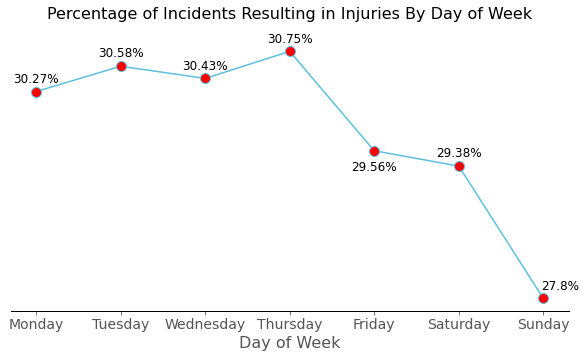

In [38]:
ax = dayofweek.plot(kind = 'line',figsize = (10, 5), color = ['#5bc0de'], \
                    marker='o',markerfacecolor='red', markersize=10)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linestyle('-')
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
ax.tick_params(labelsize=14)
ax.set_xticks(list(range(0,7,1)))
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title("Percentage of Incidents Resulting in Injuries By Day of Week", fontsize = 16, pad = 20)
ax.set_xlabel("Day of Week",fontsize=16)

for index, value in enumerate(dayofweek):
    label = str(round(value,2)) + '%'
    if (index == 4):
        ax.annotate(label, xy=(index, value-0.2), color='black', ha='center', va='center', size=12)
    elif (index == 6):
        ax.annotate(label, xy=(index+0.2, value+0.15), color='black', ha='center', va='center', size=12)
    else:
        ax.annotate(label, xy=(index, value+0.15), color='black', ha='center', va='center', size=12)
        
plt.show()  

From the line graph we can deduce that day of the week is not a very relevant factor in our study, but we can still see that on Sundays there are around 2% fewer incidents resulting in injuries.

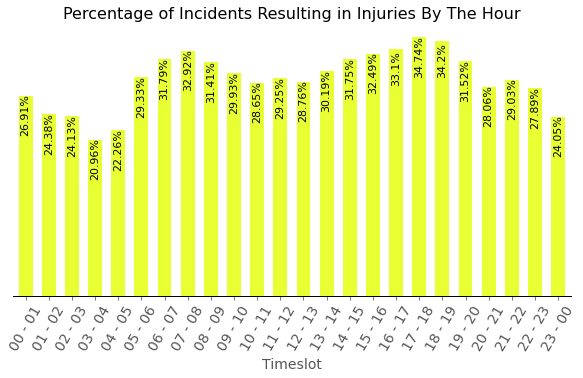

In [39]:
ax = timeslot.plot(kind = 'bar', figsize = (10,5), width = 0.6, rot = 60, color = ['#e7ff33'])

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linestyle('-')
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
ax.tick_params(labelsize=14)
ax.set_xticks(list(range(0,24,1)))
ax.set_xticklabels(sorted(df['TIMESLOT'].unique().tolist()))
ax.set_title("Percentage of Incidents Resulting in Injuries By The Hour", fontsize=16)
ax.set_xlabel("Timeslot",fontsize=14)

for index, value in enumerate(timeslot):
    label = str(round(value,2)) + '%'
    ax.annotate(label, xy=(index, value-2.5), color='black',rotation = 90, ha='center', va='center', size=11)

plt.show()  

Time of day is more important than day of week. In particular, during the peak hours (working hours, especially before and after work i.e. around 8A.M. and after 5P.M.) the accidents resulting in injuries are more common. In fact, they are 10%-15% more likely than during the calmest hours, such as 3A.M.

### Drivers Behaviour

In this part we will analyze the impact of drivers actions. In particular, we will examine how the attention of the driver **INATTENTIONIND**, being under influence while driving **UNDERINFL**, not granting the pedestrian their right of way **PEDROWNOTGRNT**, speeding **SPEEDING** and hitting a parked car **HITPARKEDCAR** affects the severity of an accident.

In [40]:
behav = df[['SEVERITYCODE','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']].copy()

Let's check the correlation between these factors and severity of an accident.

In [41]:
behav.corr()

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.000000,0.046378,0.044377,0.206283,0.038938,-0.101498
INATTENTIONIND,0.046378,1.000000,-0.025953,-0.026442,-0.048805,0.011946
UNDERINFL,0.044377,-0.025953,1.000000,-0.017585,0.092356,0.010153
PEDROWNOTGRNT,0.206283,-0.026442,-0.017585,1.000000,-0.028410,-0.030749
SPEEDING,0.038938,-0.048805,0.092356,-0.028410,1.000000,-0.028374
HITPARKEDCAR,-0.101498,0.011946,0.010153,-0.030749,-0.028374,1.000000


Clearly, **PEDROWNOTGRNT** and **HITPARTKEDCAR** have the most impact, which can easily be explained. If a pedestrian has not been granted their right of way, then some pedestrian has been involved in the accident which increases the chance that somebody has been injured compared to accidents where pedestrians have not been involved. Similarly, if a parked car was hit, then probably there were no people inside the car, which decreases the chance that somebody has been injured. <br>

Let's do some plotting to gain more insight.

In [42]:
behav = pd.DataFrame(data=[behav[behav.SEVERITYCODE == 0].sum(), \
                                behav[behav.SEVERITYCODE == 1].sum()])
behav.drop(['SEVERITYCODE'], axis = 1, inplace = True)
behav = behav.transpose()
behav.rename(columns={0:'Property Damage Only', 1:'Injury'}, inplace=True)
behav.rename(index={'INATTENTIONIND':'Inattention', 'UNDERINFL':'Under Influence', \
                        'PEDROWNOTGRNT':'Pedestrian Way Not Granted','SPEEDING':'Speeding',\
                        'HITPARKEDCAR':'Hit Parked Car'}, inplace=True)

for index in range(0, behav.shape[0]):
    behav.iloc[index,:] = 100*behav.iloc[index,:] / \
    (behav.iloc[index,0] + behav.iloc[index,1])

behav.drop(['Property Damage Only'], axis = 1, inplace = True)

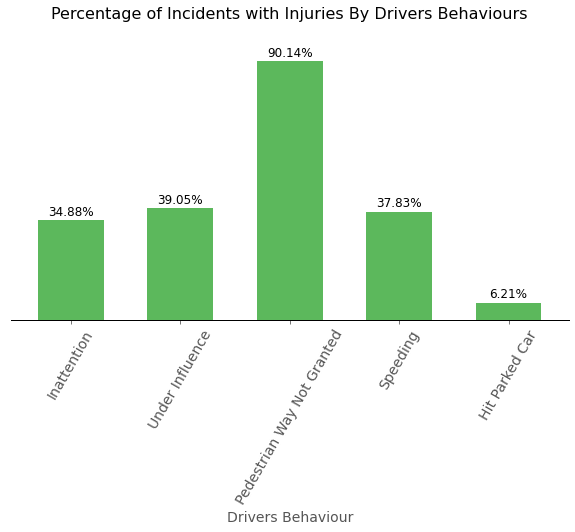

In [43]:
ax = behav.plot(kind = 'bar', figsize = (10, 5), width = 0.6, rot = 60, color = ['#5cb85c'])

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linestyle('-')
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
ax.tick_params(labelsize=14)
ax.set_title("Percentage of Incidents with Injuries By Drivers Behaviours", fontsize=16, pad=30)
ax.set_xlabel("Drivers Behaviour",fontsize=14)
ax.get_legend().remove()

for i in list(range(0,behav.shape[0],1)):
    value = behav.iloc[i].values[0]
    label = str(round(value,2)) + '%'
    ax.annotate(label, xy=(i, value+3), color='black', ha='center', va='center', size=12)   
plt.show()

It is clear that from around 35% to 40% incidents involving inattention, being under influence of alcohol or drugs and speeding result in injuries. We also know that around 90% of incidents where pedestrian was not granted their right of way and approximately 6% of incidents where a parked car was hit result in injuries as well.

### Parties Involved

Now we will see how the number of parties involved influence the severity of collisions, we will investigate numbers of people, pedestrians, pedal cyclists and vehicles involved.

In [44]:
parties = df[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].copy()
parties.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000


In [45]:
for col in parties.columns.tolist():
    print(col)
    print(sorted(parties[col].unique().tolist()))

SEVERITYCODE
[0, 1]
PERSONCOUNT
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 41, 43, 44, 47, 48, 53, 54, 57, 81]
PEDCOUNT
[0, 1, 2, 3, 4, 5, 6]
PEDCYLCOUNT
[0, 1, 2]
VEHCOUNT
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


As incidents involving high numbers of people, pedestrians, pedalcyclists or vehicles are rare, we do not have a lot of data with them thus group such incidents as follows. We will also use it for modeling, as otherwise our model might be overfitting.

In [46]:
condition = parties.PERSONCOUNT >= 8
parties.loc[condition, 'PERSONCOUNT'] = '8+'
condition = parties.PEDCOUNT >= 2
parties.loc[condition, 'PEDCOUNT'] = '2+'
condition = parties.VEHCOUNT >= 5
parties.loc[condition, 'VEHCOUNT'] = '5+'

In [47]:
person = parties[parties.SEVERITYCODE == 1]['PERSONCOUNT'].value_counts()*100/parties['PERSONCOUNT'].value_counts()
person = person.rename(index = {'8+':8}).sort_index().rename(index = {8:'8+'})

ped = parties[parties.SEVERITYCODE == 1]['PEDCOUNT'].value_counts()*100/parties['PEDCOUNT'].value_counts()
ped = ped.rename(index = {'2+':2}).sort_index().rename(index = {2:'2+'})

pedcyl = parties[parties.SEVERITYCODE == 1]['PEDCYLCOUNT'].value_counts()*100/parties['PEDCYLCOUNT'].value_counts()
pedcyl = pedcyl.sort_index()

veh = parties[parties.SEVERITYCODE == 1]['VEHCOUNT'].value_counts()*100/parties['VEHCOUNT'].value_counts()
veh = veh.rename(index = {'5+':5}).sort_index().rename(index = {5:'5+'})

Now we can create some plots to understand the data.

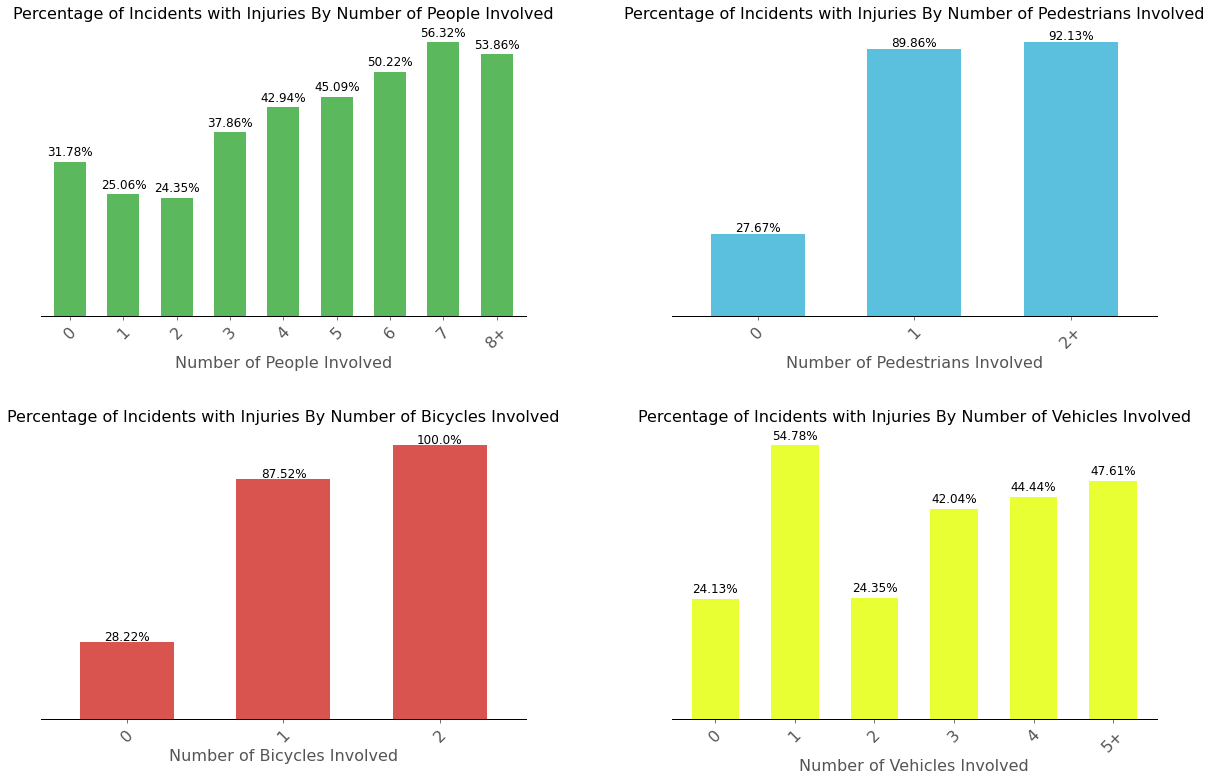

In [48]:
fig = plt.figure()

fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 

# Subplot 1:  
person.plot(kind='bar',rot=45,width=0.6,figsize=(20, 12),color=['#5cb85c'], ax=ax0)

ax0.spines['bottom'].set_linestyle('-')
ax0.spines['bottom'].set_color('black')
ax0.set_facecolor("white")
ax0.yaxis.set_ticklabels([])
ax0.yaxis.set_ticks([])
ax0.tick_params(labelsize=16)
ax0.set_title("Percentage of Incidents with Injuries By Number of People Involved", fontsize=16, pad=10)
ax0.set_xlabel('Number of People Involved',fontsize=16)

for index, value in enumerate(person):
    label = str(round(value,2)) + '%'
    ax0.annotate(label, xy=(index, value+2), color='black', ha='center', va='center', size=12)

# Subplot 2: 
ped.plot(kind='bar', rot=45, figsize=(20, 12), width=0.6, color=['#5bc0de'], ax=ax1)

ax1.spines['bottom'].set_linestyle('-')
ax1.spines['bottom'].set_color('black')
ax1.set_facecolor("white")
ax1.yaxis.set_ticklabels([])
ax1.yaxis.set_ticks([])
ax1.tick_params(labelsize=16)
ax1.set_title("Percentage of Incidents with Injuries By Number of Pedestrians Involved", fontsize=16, pad=10)
ax1.set_xlabel('Number of Pedestrians Involved',fontsize=16)

for index, value in enumerate(ped):
    label = str(round(value,2)) + '%'
    ax1.annotate(label, xy=(index, value+2), color='black', ha='center', va='center', size=12)

# Subplot 3:  
pedcyl.plot(kind='bar',rot=45,width=0.6,figsize=(20, 12),color=['#d9534f'], ax=ax2)

ax2.spines['bottom'].set_linestyle('-')
ax2.spines['bottom'].set_color('black')
ax2.set_facecolor("white")
ax2.yaxis.set_ticklabels([])
ax2.yaxis.set_ticks([])
ax2.tick_params(labelsize=16)
ax2.set_title("Percentage of Incidents with Injuries By Number of Bicycles Involved", fontsize=16,pad=10)
ax2.set_xlabel('Number of Bicycles Involved',fontsize=16)

for index, value in enumerate(pedcyl):
    label = str(round(value,2)) + '%'
    ax2.annotate(label, xy=(index, value+2), color='black', ha='center', va='center', size=12)

# Subplot 4:  
veh.plot(kind='bar',rot=45,width=0.6,figsize=(20, 12),color=['#e7ff33'], ax=ax3)

ax3.spines['bottom'].set_linestyle('-')
ax3.spines['bottom'].set_color('black')
ax3.set_facecolor("white")
ax3.yaxis.set_ticklabels([])
ax3.yaxis.set_ticks([])
ax3.tick_params(labelsize=16)
ax3.set_title("Percentage of Incidents with Injuries By Number of Vehicles Involved", fontsize=16, pad=10)
ax3.set_xlabel('Number of Vehicles Involved',fontsize=16)

for index, value in enumerate(veh):
    label = str(round(value,2)) + '%'
    ax3.annotate(label, xy=(index, value+2), color='black', ha='center', va='center', size=12)

plt.show()

The plots tell us that whenever there are more than 2 people involved, the likelihood of a collision resulting in injuries is increasing as the number of people increases. A collision involving any number of pedestrians or pedalcyclists has at least 87% chance to result in injuries. The last plot tells us that an incident involving one vehicle is more than 50% likely to result in injury (which makes sense, if there was only one vehicle involved, then there was also either an object or a person involved). Incidents involving none or two vehicles are the least likely to result in injuries, however, the chance of  an incident involving more than 2 vehicles resulting in injuries increases the number of vehicles involved goes up. <br>

As information from **PEDCYLCOUNT** and **PEDCOUNT** attributes coincide, instead of having both of these attributes we will keep only **PEDCOUNT** where each entry will be equal to the sum of pedal cyclists and pedestrians involved.

In [49]:
df['PEDCOUNT'] = df['PEDCOUNT']+df['PEDCYLCOUNT']

In [50]:
df.drop(['PEDCYLCOUNT'],axis=1,inplace=True)

### Weather, Road & Light Conditions

To investigate the influence of weather, road and light conditions we will be using only plotting.

In [51]:
cond = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].copy()

As this dataframe has null values, we have to compute the percentage of all incidents in this dataframe resulting in injuries so that we could be able to decide if weather, road and light conditions are valuable factors to our study.

In [52]:
print('By our data where weather is recorded ' + \
      str(round(100*cond[cond.WEATHER.isnull()==False]['SEVERITYCODE'].sum()/cond[cond.WEATHER.isnull()==False].shape[0],2)) + \
      '% of incidents result in injuries')
print('By our data where road conditions are recorded ' + \
      str(round(100*cond[cond.ROADCOND.isnull()==False]['SEVERITYCODE'].sum()/cond[cond.ROADCOND.isnull()==False].shape[0],2)) + \
      '% of incidents result in injuries')
print('By our data where light conditions are recorded ' + \
      str(round(100*cond[cond.LIGHTCOND.isnull()==False]['SEVERITYCODE'].sum()/cond[cond.LIGHTCOND.isnull()==False].shape[0],2)) + \
      '% of incidents result in injuries')

By our data where weather is recorded 32.34% of incidents result in injuries
By our data where road conditions are recorded 32.29% of incidents result in injuries
By our data where light conditions are recorded 32.11% of incidents result in injuries


Now we can start plotting.

In [53]:
weather = cond[cond.SEVERITYCODE == 1]['WEATHER'].value_counts()*100/cond['WEATHER'].value_counts()
road = cond[cond.SEVERITYCODE == 1]['ROADCOND'].value_counts()*100/cond['ROADCOND'].value_counts()
light = cond[cond.SEVERITYCODE == 1]['LIGHTCOND'].value_counts()*100/cond['LIGHTCOND'].value_counts()

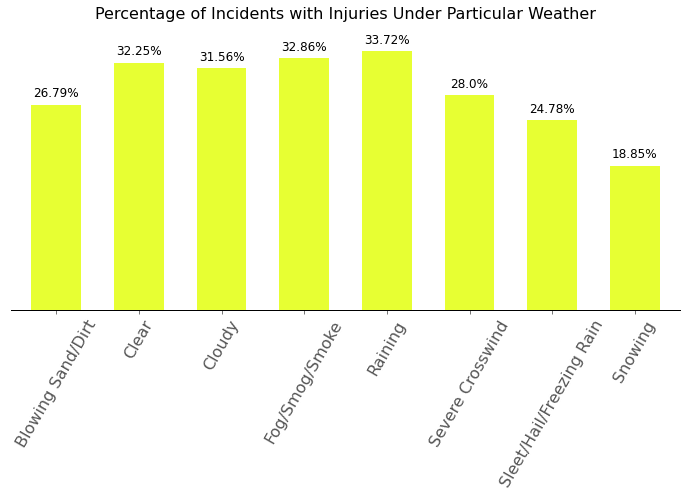

In [54]:
ax = weather.plot(kind='bar',rot=60,width=0.6,figsize=(12, 5),color=['#e7ff33'])

ax.spines['bottom'].set_linestyle('-')
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
ax.tick_params(labelsize=16)
ax.set_title("Percentage of Incidents with Injuries Under Particular Weather", fontsize=16, pad=20)

for index, value in enumerate(weather):
    label = str(round(value,2)) + '%'
    ax.annotate(label, xy=(index, value+1.5), color='black', ha='center', va='center', size=12)

plt.show()

We can deduce that more incidents result in injuries when the weather is clear, cloudy, there is fog, smog or smoke or it is raining, whereas when it is blowind sand or dirt, there is severe crosswind, sleet, hail, freezing rain or it is snowing we have much fewer incidents resulting in injuries.

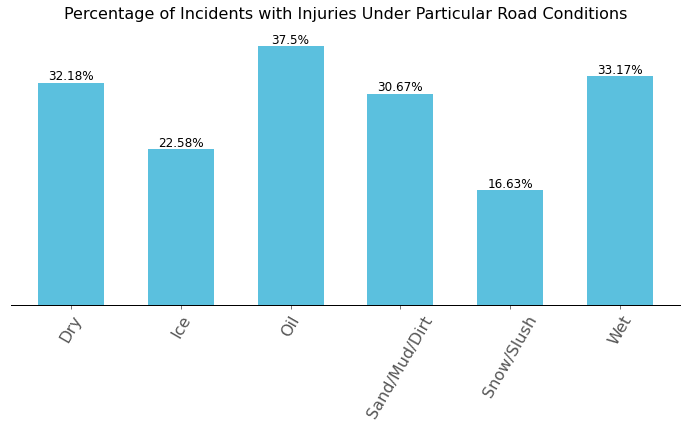

In [55]:
ax = road.plot(kind='bar', rot=60, figsize=(12,5), width=0.6, color=['#5bc0de'])

ax.spines['bottom'].set_linestyle('-')
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
ax.tick_params(labelsize=16)
ax.set_title("Percentage of Incidents with Injuries Under Particular Road Conditions", fontsize=16, pad=15)

for index, value in enumerate(road):
    label = str(round(value,2)) + '%'
    ax.annotate(label, xy=(index, value+1), color='black', ha='center', va='center', size=12)
plt.show()

Regarding the road conditions it is clear that oil on the road highly increases the possibility of getting injured if a car accident is to happen. Injuries are also often when the road is dry, wet or there is sand, dirt or mud on the road. However, incidents result in injuries much more rarely when it is snow, slush or ice on the road. This supports our earlier results from investigating weather. <br>

Generally, with the exception of oil on the road, we can see that fewer incidents result in injuries under extreme conditions, such as blowing sand or dirt, severe crosswind, sleet, hail, freezing rain or snowing; ice, snow or slush on the road. It is possible that under such (more extreme and dangerous) conditions people are simply more concentrated and cautious, pay more attention and drive more slowly than they normally would.

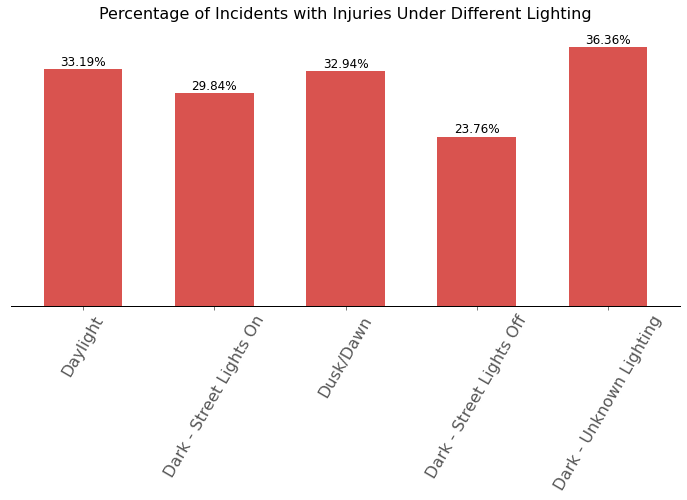

In [56]:
ax = light.plot(kind='bar',rot=60,width=0.6,figsize=(12,5),color=['#d9534f'])

ax.spines['bottom'].set_linestyle('-')
ax.spines['bottom'].set_color('black')
ax.set_facecolor("white")
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
ax.tick_params(labelsize=16)
ax.set_title("Percentage of Incidents with Injuries Under Different Lighting", fontsize=16, pad=15)

for index, value in enumerate(light):
    label = str(round(value,2)) + '%'
    ax.annotate(label, xy=(index, value+1), color='black', ha='center', va='center', size=12)

plt.show()  

Data about light conditions do not tell us much: it seems like there are fewer severe incidents during the dark regardless whether the street lights are on or off, however, the last bar shows the exact opposite - the highest percentage of severe incidents is during the dark when the lighting is unknown. Observe that we can state with confidence that the percentages of severe incidents during daylight, dusk and dawn do not differ much from the percentage of all severe incidents where the light conditions are recorded (i.e. 32.11%). This means that the percentage of severe incidents when it is dark (regardless whether lighting is unknown, street lights are on or off) should be similar. Thus we can deduce that lighting is not important to our case study and drop this feature from our dataframe. <br>

In [57]:
df.drop(['LIGHTCOND'], axis=1, inplace=True)

### Location

Lastly, we analyze, using the help of plotting, the type of the location, junction and collision. This dataframe also has null values, so we have to compute the percentages of all incidents with recorded data in this dataframe resulting in injuries so that we could be able to decide if location, junction and collision types are valuable factors to our study.

In [58]:
loc = df[['SEVERITYCODE','ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE']].copy()
print('By our data where location type is recorded ' + \
      str(round(100*loc[loc.ADDRTYPE.isnull()==False]['SEVERITYCODE'].sum()/loc[loc.ADDRTYPE.isnull()==False].shape[0],2)) + \
      '% of incidents result in injuries')
print('By our data where junction type is recorded ' + \
      str(round(100*loc[loc.JUNCTIONTYPE.isnull()==False]['SEVERITYCODE'].sum()/loc[loc.JUNCTIONTYPE.isnull()==False].shape[0],2)) + \
      '% of incidents result in injuries')
print('By our data where collision type is recorded ' + \
      str(round(100*loc[loc.COLLISIONTYPE.isnull()==False]['SEVERITYCODE'].sum()/loc[loc.COLLISIONTYPE.isnull()==False].shape[0],2)) + \
      '% of incidents result in injuries')

By our data where location type is recorded 30.06% of incidents result in injuries
By our data where junction type is recorded 30.68% of incidents result in injuries
By our data where collision type is recorded 30.3% of incidents result in injuries


In [59]:
adr = loc[loc.SEVERITYCODE == 1]['ADDRTYPE'].value_counts()*100/loc['ADDRTYPE'].value_counts()
juc = loc[loc.SEVERITYCODE == 1]['JUNCTIONTYPE'].value_counts()*100/loc['JUNCTIONTYPE'].value_counts()
col = loc[loc.SEVERITYCODE == 1]['COLLISIONTYPE'].value_counts()*100/loc['COLLISIONTYPE'].value_counts()

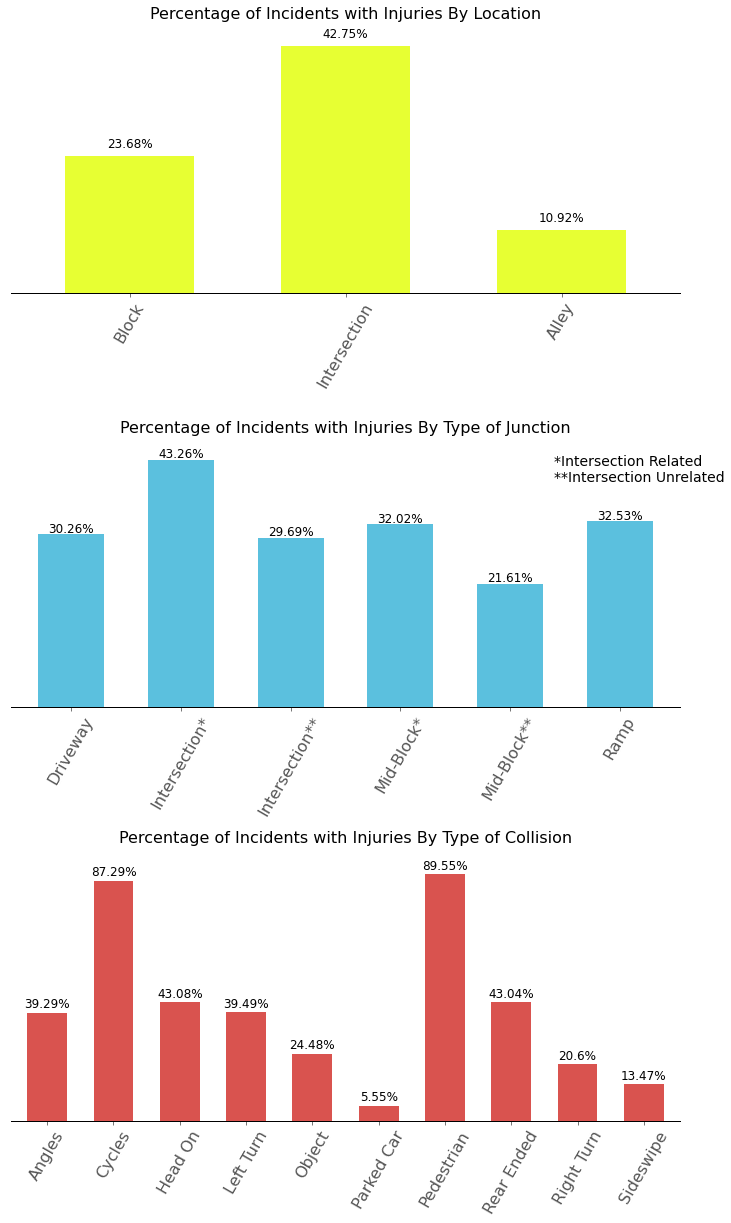

In [60]:
fig = plt.figure()

fig.subplots_adjust(hspace = 0.6)

ax0 = fig.add_subplot(3, 1, 1) 
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3) 

# Subplot 1:  
adr.plot(kind='bar',rot=60,width=0.6,figsize=(12, 20),color=['#e7ff33'], ax=ax0)

ax0.spines['bottom'].set_linestyle('-')
ax0.spines['bottom'].set_color('black')
ax0.set_facecolor("white")
ax0.yaxis.set_ticklabels([])
ax0.yaxis.set_ticks([])
ax0.tick_params(labelsize=16)
ax0.set_title("Percentage of Incidents with Injuries By Location", fontsize=16, pad=15)

for index, value in enumerate(adr):
    label = str(round(value,2)) + '%'
    ax0.annotate(label, xy=(index, value+2), color='black', ha='center', va='center', size=12)

# Subplot 2: 
juc.plot(kind='bar', rot=60, figsize=(12,20), width=0.6, color=['#5bc0de'], ax=ax1)

ax1.spines['bottom'].set_linestyle('-')
ax1.spines['bottom'].set_color('black')
ax1.set_facecolor("white")
ax1.yaxis.set_ticklabels([])
ax1.yaxis.set_ticks([])
ax1.tick_params(labelsize=16)
ax1.set_title("Percentage of Incidents with Injuries By Type of Junction", fontsize=16, pad=15)
ax1.set_xticks(list(range(0,juc.shape[0],1)))
ax1.set_xticklabels(['Driveway','Intersection*','Intersection**','Mid-Block*','Mid-Block**','Ramp'])

textstr = '\n'.join(('*Intersection Related', '**Intersection Unrelated'))
ax1.annotate(textstr, xy=(4.4, 39), va='bottom', ha='left',color='black', size=14)

for index, value in enumerate(juc):
    label = str(round(value,2)) + '%'
    ax1.annotate(label, xy=(index, value+1), color='black', ha='center', va='center', size=12)

# Subplot 3:  
col.plot(kind='bar',rot=60,width=0.6,figsize=(12,20),color=['#d9534f'], ax=ax2)

ax2.spines['bottom'].set_linestyle('-')
ax2.spines['bottom'].set_color('black')
ax2.set_facecolor("white")
ax2.yaxis.set_ticklabels([])
ax2.yaxis.set_ticks([])
ax2.tick_params(labelsize=16)
ax2.set_title("Percentage of Incidents with Injuries By Type of Collision", fontsize=16, pad=20)

for index, value in enumerate(col):
    label = str(round(value,2)) + '%'
    ax2.annotate(label, xy=(index, value+3), color='black', ha='center', va='center', size=12)

plt.show()  

Using these graphs, we found out that incidents happening at intersection and their cause being intersection related are most likely to end up in injuries. The intersection unrelated incidents happening in alleys or blocks are have the slimmest chance of resulting in injuries.

Predictably, as we have seen when investigating the effect of pedestrians and pedal cyclists involved and whether a parked car was hit or a pedestrian involved, the last plot also shows the same results: incidents involving pedestrians or/and pedal cyclists are extremely likely to result in injuries, whereas incidents where a parked car was hit have a very low chance of resulting in injuries. We have also found out that if the collision happened with an object or it was a sideswipe, then it is more likely to end up just with property damage. Interestingly, collision happening when turning left instead of right have a twice higher chance that somebody gets injured!

## Modeling <br>

Since we aim to predict **SEVERITYCODE** which takes values (0) and (1) for 'Property Damage Only' and 'Minor Injury' respectively i.e. **SEVERITYCODE** takes binary values, we will implement Gradient Boosting Classifier, XGBoost Classifier and Decision Tree Classifier as these are great for predicting discrete values. We will also implement Logistic Regression Model for comparison of accuracy between classifiers and regression, as Logistic Regression model is mostly used for predicting continuous values. <br>

Because our data is unbalanced i.e. we have 29.89% (not 50%) of all collisions resulting in injuries, we will have to scale our models. For Gradient Boosting Classifier, Decision Tree and Logistic Regression we will use *sample_weight* function and for XGBoost we will use *scale_pos_weight* function. It is important to understand that without this scaling we would get higher overall accuracy scores, but then the percentage of collisions resulting in injuries predicted correctly would be much lower than we want. We need to predict collisions resulting in injuries as accurately as possible, as our goal is to prevent them i.e. it is better for us to have a lower percentage of accurately predicted incidents resulting in property damage only, but a higher percentage of accurately predicted collisions resulting in injuries. <br>

First, we have to transform our dataframe values into numeric values, deal with missing values and irrelevant data so we could use the dataframe for modeling. This is how our dataframe looks now.

In [61]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,DAYOFWEEK,TIMESLOT
0,1,Intersection,Angles,2,0,2,Intersection (intersection related),11,0,0,Cloudy,Wet,0,0,10,0,2,14 - 15
1,0,Block,Sideswipe,2,0,2,Mid-Block (intersection unrelated),16,0,0,Raining,Wet,0,0,11,0,2,18 - 19
2,0,Block,Parked Car,4,0,3,Mid-Block (intersection unrelated),14,0,0,Cloudy,Dry,0,0,32,0,3,10 - 11
3,0,Block,NaN,3,0,3,Mid-Block (intersection unrelated),11,0,0,Clear,Dry,0,0,23,0,4,09 - 10
4,1,Intersection,Angles,2,0,2,Intersection (intersection related),11,0,0,Raining,Wet,0,0,10,0,2,08 - 09


As we still have missing values, we replace null values to 'Unknown'.

In [62]:
df = df.replace(np.nan, 'Unknown')

We also categorize the numbers of people, pedestrians and vehicles involved in the same manner as before, but instead of string we use integer this time, as our modeling requires numeric data.

In [63]:
condition = df.PERSONCOUNT >= 8
df.loc[condition, 'PERSONCOUNT'] = 8
condition = df.PEDCOUNT >= 3
df.loc[condition, 'PEDCOUNT'] = 3
condition = df.VEHCOUNT >= 5
df.loc[condition, 'VEHCOUNT'] = 5

And finally we transform all the attributes with object type data into attributes with numeric data.

In [64]:
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
INATTENTIONIND     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
PEDROWNOTGRNT      int64
SPEEDING           int64
ST_COLCODE         int64
HITPARKEDCAR       int64
DAYOFWEEK          int64
TIMESLOT          object
dtype: object

In [65]:
col_obj = ['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','TIMESLOT']

In [66]:
for col in col_obj:
    df[col] = df[col].replace(df[col].unique().tolist(),list(range(0,df[col].nunique(),1)))

We will now create data sets for modeling and testing. Note that we create two copies as we will preproccess them differently: X1 will be used for Gradient Boosting Classifier and XGBoost Classifier and X will be used for Decision Tree Classifier and Logistic Regression, thus we also create two versions of data splits into training and testing sets.

In [67]:
X = df.copy()
X.drop(['SEVERITYCODE'],axis = 1,inplace=True)

X1 = X.copy()

y = df['SEVERITYCODE']

X = preprocessing.StandardScaler().fit(X).transform(X)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=4)

#### Gradient Boosting Classifier

Gradient Boosting is a machine learning technique commonly used for classification problems such as this one. This method produces a prediction model which is a combination of many weaker learning models, mostly decision trees. Gradient Boosting Classifier allows to pick a desired learning rate, thus will implement this model for various learning rates to find one producing the most accurate model.

In [68]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
train_acc = [0,0,0,0,0,0,0]
test_acc = [0,0,0,0,0,0,0]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, \
                                        max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train1, y_train1)
    train_acc[lr_list.index(learning_rate)] = gb_clf.score(X_train1, y_train1)
    test_acc[lr_list.index(learning_rate)] = gb_clf.score(X_test1, y_test1)

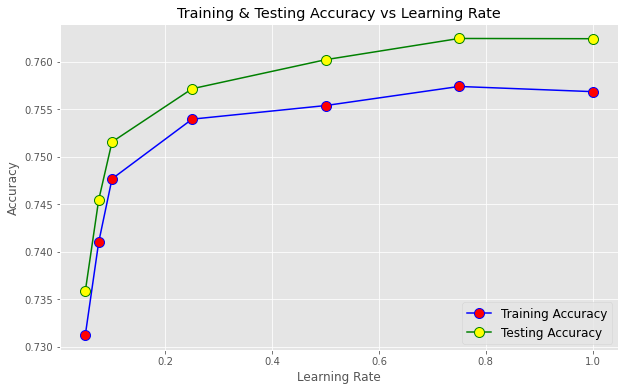

In [69]:
plt.figure(figsize=(10,6))    
plt.plot(lr_list, train_acc, label = 'Training Accuracy', color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(lr_list, test_acc, label = 'Testing Accuracy', color='green', marker='o',markerfacecolor='yellow', markersize=10);    

plt.title('Training & Testing Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(fontsize = 12, loc = 4)

plt.show()

In [70]:
print("Best training accuracy: ",round(max(train_acc),3)," at learning rate ",lr_list[train_acc.index(max(train_acc))])
print("Best testing accuracy: ",round(max(test_acc),3)," at learning rate ",lr_list[test_acc.index(max(test_acc))])

Best training accuracy:  0.757  at learning rate  0.75
Best testing accuracy:  0.762  at learning rate  0.75


And now using classifier with learning rate 0.75 (as it provides the most accurate model) we make predictions.

In [71]:
sample_weights = np.zeros(len(y_train))
sample_weights[y_train1 == 0] = 0.2989
sample_weights[y_train1 == 1] = 0.7011

GBC_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, \
                                       random_state=0).fit(X_train1, y_train1, sample_weight=sample_weights)
GBC_pred = GBC_model.predict(X_test1)
GBC_pred_prob=GBC_model.predict_proba(X_test1)

#### XGBoost Classifier 
XGBoost stands for Extreme Gradient Boosting Classifier, it allows us to create a model which is essentially the same as Gradient Boosting Classifier, although it controls overfitting much better and is faster. We now implement XGBoost Classifier and make some predictions.

In [72]:
scale_pos_weight = df[df.SEVERITYCODE==0]['SEVERITYCODE'].count()/\
df[df.SEVERITYCODE==1]['SEVERITYCODE'].count() 
XGB_model = XGBClassifier(scale_pos_weight=scale_pos_weight).fit(X_train1, y_train1)
XGB_pred = XGB_model.predict(X_test1)
XGB_pred_prob = XGB_model.predict_proba(X_test1)

#### Desicion Tree Classifier <br>

We train the Decision Tree with training data, specify criterion = "entropy" so we can see the information gain of each node and set maximum depth of the tree to 4. After that we make predicions.

In [73]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight='balanced')
DT_model.fit(X_train,y_train)
DT_pred = DT_model.predict(X_test)
DT_pred_prob = DT_model.predict_proba(X_test)

#### Logistic Regression <br>
To compare our classifiers with regression we implement Logistic Regression from sklearn package. As this version supports regularization technique used to solve overfitting problem, we set parameter C (which indicates inverse of regularization strength) to 0.01 to specify stronger regularization. Now we fit our model with training set and make predictions. We also use predict_proba to give us probabilities that the model has predicted the severity of the accident correctly.

In [74]:
LR_model = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced').fit(X_train,y_train)
LR_pred= LR_model.predict(X_test)
LR_pred_prob = LR_model.predict_proba(X_test)

## Results <br>
We will compute accuracies for all machine learning models that we trained and analyze our models using confusion matrices. A confusion matrix consists of percentages of accidents with injuries predicted correctly (true positive TP), accidents with injuries predicted incorrectly (false negative FN), accidents without injuries predicted correctly (true negative TN) and accidents without injuries predicted incorrectly (false positive FP). <br>

For accuracy evaluation we will also use:
- *Jaccard Index*, which corresponds to the size of the intersection of the set of our predicted values and the set of actual values divided by the size of the union of these two sets. We use function *accuracy_score* as in binary and multiclass classification this function is equal to the *jaccard_score* function.
- *F1-score*, which is the harmonic average of the precision and recall. Precision is a measure of accuracy given that a class label has been predicted, whilst recall is true positive rate.
- *Logarithmic loss*, which measures the performance of a classifier where the predicted output is a probability value between 0 and 1, as our models can return the probability of the class label predicted correctly.

*Jaccard index* and *F1-score* take values between 0 and 1, with 0 being the worst value and 1 being the best, meanwhile *LogLoss* takes values between 0 and 1 with 0 being the best value and 1 being the worst. <br>

First we need to create a function which plots a normalized confusion matrix. 

In [75]:
def plot_cnf(cm, classes, normalize=False, ax=None, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if ax is None:
        ax = plt.gca()
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title, pad=10)
    ax.set_xticks([1,0])
    ax.set_yticks([0,1])
    ax.set_xticklabels(['Property Damage','Injury'], rotation = 45)
    ax.set_yticklabels(['Injury','Property Damage'])

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center", fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")
    return(ax)

Now we measure performance of our models using metrics Jaccard Index, F1-Score and Logarithmic Loss.

In [76]:
j_gbc = round(accuracy_score(y_test1, GBC_pred),2)
j_xgb = round(accuracy_score(y_test1, XGB_pred),2)
j_dt = round(accuracy_score(y_test, DT_pred),2)
j_lr = round(accuracy_score(y_test, LR_pred),2)

f_gbc = round(f1_score(y_test1, GBC_pred, average='weighted'),2)
f_xgb = round(f1_score(y_test1, XGB_pred, average='weighted'),2)
f_dt = round(f1_score(y_test, DT_pred, average='weighted'),2)
f_lr = round(f1_score(y_test, LR_pred, average='weighted'),2)

l_gbc = round(log_loss(y_test1, GBC_pred_prob),2)
l_xgb = round(log_loss(y_test1, XGB_pred_prob),2)
l_dt = round(log_loss(y_test, DT_pred_prob),2)
l_lr = round(log_loss(y_test, LR_pred_prob),2)

results = pd.DataFrame(np.array([['Gradient Boost Classifier', j_gbc, f_gbc, l_gbc], \
                                 ['XGBoost Classifier', j_xgb, f_xgb, l_xgb], \
                                 ['Decision Tree Classifier', j_dt, f_dt, l_dt], \
                                 ['Logistic Regression', j_lr, f_lr, l_lr]]), \
                                columns=['Model', 'Jaccard Index', 'F1-Score', 'LogLoss'])
results

,Model,Jaccard Index,F1-Score,LogLoss
0,Gradient Boost Classifier,0.68,0.69,0.54
1,XGBoost Classifier,0.69,0.71,0.52
2,Decision Tree Classifier,0.67,0.68,0.56
3,Logistic Regression,0.69,0.7,0.58


We can see that the overall accuracy of all our models is similar, with XGBoost being the most accurate model. Even though scaling lead us to up to 12% lower Jaccard Index, F1-Score overall remained similar. This tells us that in general our predictions are less accurate, but as our data is unbalanced F1-score is more important to us and all models have relatively high F1-scores. Regarding LogLoss, we can see that our models have quite low scores, meaning there is a lot of uncertainty i.e. the distinction between features of the two classes is not very clear. <br>

Interestingly, even though Logistic Regression is mostly used for predicting continuous values, according to accuracy measures we can see that in our classification problem it has performed quite well. The worst performing model seems to be the Decision Tree. Now we can take a look at confusion matrices for all our models and examine them to understand better how well our models perform.

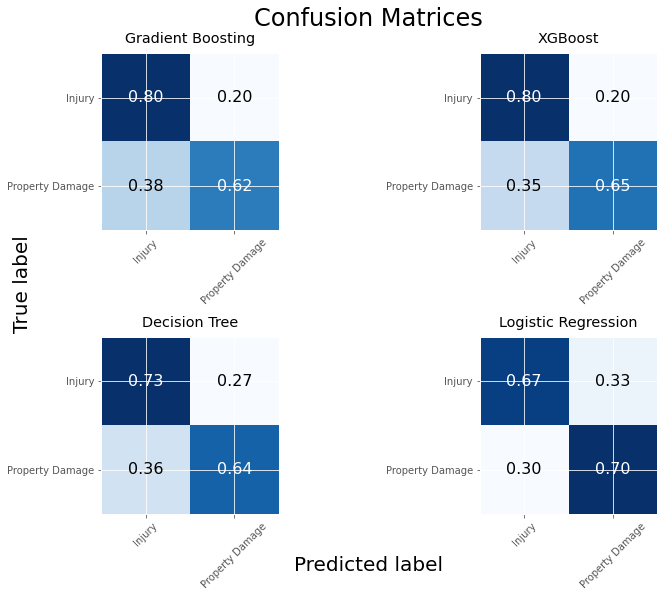

In [77]:
fig = plt.figure(figsize=(12,8))

fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.6)

ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4) 

GBC_matrix = confusion_matrix(y_test1, GBC_pred, labels=[1,0])
np.set_printoptions(precision=2)

plot_cnf(GBC_matrix, classes=['Injury','Property Damage Only'], \
                      normalize=True, title='Gradient Boosting', ax=ax0)

XGB_matrix = confusion_matrix(y_test1, XGB_pred, labels=[1,0])
np.set_printoptions(precision=2)

plot_cnf(XGB_matrix, classes=['Injury','Property Damage Only'], \
                      normalize=True, title='XGBoost', ax=ax1)

DT_matrix = confusion_matrix(y_test, DT_pred, labels=[1,0])
np.set_printoptions(precision=2)

plot_cnf(DT_matrix, classes=['Injury','Property Damage Only'], \
                      normalize=True, title='Decision Tree',ax=ax2)

LR_matrix = confusion_matrix(y_test, LR_pred, labels=[1,0])
np.set_printoptions(precision=2)

plot_cnf(LR_matrix, classes=['Injury','Property Damage Only'], \
                      normalize=True, title='Logistic Regression', ax=ax3)
fig.suptitle('Confusion Matrices',fontsize=24)
fig.text(0.5, 0.01, 'Predicted label', ha='center', va='center',fontsize=20)
fig.text(0.1, 0.5, 'True label', ha='center', va='center', rotation='vertical', fontsize=20)
plt.savefig('matrices.png')
plt.show()

We can see a clearer picture of what is going on. As we assumed in the beginning, the Logistic Regression performs the worst in our problem i.e. it has the lowest rate of correctly predicting collisions resulting in injuries. In fact, 33% of the time it fails to predict which collisions will result in injuries. Not only that, 30% of the time it predicts that a collision will result in injury, even though it will not! In comparison, Decision Tree is slightly better and yet has similar flaws. Using these models could lead to too many resources spent on preventing severe collisions when in fact a high percentage of them would result in property damage only, and quite high percentage of them would be misclassified as property damage. <br>

Gradient Boosting and XGBoost classifiers are the best for our problem, they both relatively accurately predict which collisions will result in injuries and have a comparatively small chance of failing to predict that a collision will result in property damage only. Out of these two, XGBoost is slightly more accurate. Thus, we conclude that XGBoost is the best classifier amongst the ones we tried.

## Discussion & Conclusion

In this project we have analysed the given data of collisions in Seattle between 2014 and now. We were tasked to find out which factors are the most influential on severity of a collision and create a machine learning model which predicts the severity of a collision. We have found out that more severe collisions tend to happen during peak hours when people go to/from work, that is, around 8A.M. and 5P.M.. Collisions occurring at intersections or mid-block, but intersection related are also likely to be severe. If there are pedestrians and/or pedal cyclists involved, the collision is highly likely to result in injuries. We have created several machine learning models which predict whether the collision will result in injuries or property damage only, evaluated them and concluded that XGBoost was the best classifier in our case study. <br>

Our study results could helpful in preventing more severe accidents, which potentially could be done by placing warning signs in certain intersections and roads, as well as reminders to be careful of pedestrians and cyclists and to not rush to work or home after it (better late, than hurt), educating pedestrians and cyclists to behave more carefully on the road, and providing information regarding weather and road conditions.